In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2



Посмотрите формат таблиц

Сразу переведем столбец "Дата" в правильный формат

In [5]:
# Чтение данных с правильным разделителем (табуляция)
df = pd.read_csv('data.csv', sep='\t')

# Вывод названий столбцов, чтобы проверить, есть ли лишние символы
print(df.columns)

Index(['Дата,Склад,Контрагент,Номенклатура,Количество'], dtype='object')


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
# Чтение данных с разделителем запятая
df = pd.read_csv('data.csv', sep=',')

# Убедимся, что столбец "Дата" в правильном формате
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

# Проверка первых строк
print("Первые строки данных:\n", df.head())

# Группировка данных по столбцу 'Дата' и подсчет количества продаж
grouped_sales = df.groupby('Дата').size().reset_index(name='Количество продаж')

# Вывод результата
print("\nКоличество продаж по датам:\n", grouped_sales)

Первые строки данных:
         Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2

Количество продаж по датам:
           Дата  Количество продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [7]:
print(grouped_sales.head())

        Дата  Количество продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


Нарисуйте график продаж у `grouped_df`

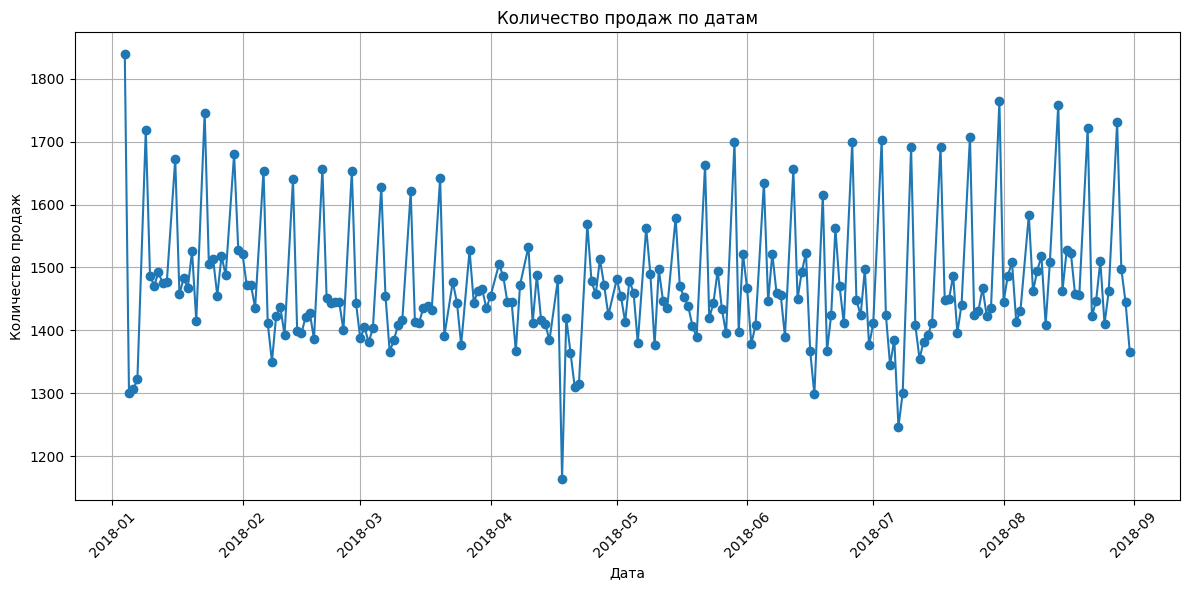

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных с разделителем запятая
df = pd.read_csv('data.csv', sep=',')

# Убедимся, что столбец "Дата" в правильном формате
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

# Группировка данных по столбцу 'Дата' и подсчет количества продаж
grouped_sales = df.groupby('Дата').size().reset_index(name='Количество продаж')

# Настройка графика
plt.figure(figsize=(12, 6))
plt.plot(grouped_sales['Дата'], grouped_sales['Количество продаж'], marker='o', linestyle='-')

# Добавление заголовка и подписей
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

Общая тенденция: График демонстрирует значительные колебания в количестве продаж в течение всего периода. Значения варьируются от низких до высоких показателей, что указывает на динамичную природу продаж.

Падение и возрастание: В течение всего периода наблюдаются циклы падения и роста, которые обычно происходят в диапазоне от 1300 до 1600 продаж. Эти колебания могут быть связаны с различными факторами, такими как сезонные изменения, маркетинговые кампании или изменения в потребительских предпочтениях.

Самые низкие продажи: На графике видно, что самые низкие показатели продаж зафиксированы в период между апрелем и маем 2018 года. Это может указывать на снижение интереса потребителей или возможные внешние факторы, влияющие на спрос в этот промежуток времени.

Самые высокие продажи: Напротив, максимальные значения продаж наблюдаются в январе 2018 года. Этот всплеск может быть связан с постновогодними распродажами или высоким уровнем покупательской активности в начале года.

Временные пики и спады: График демонстрирует четкие пики, за которыми следуют спады, что может указывать на циклы спроса, присущие этому рынку. Состояние рынка и экономические условия могут также влиять на эти колебания.

Визуальные характеристики: Линия графика плавно меняется, что подчеркивает вариативность продаж. Каждый пик и спад на графике указывают на значимые события или изменения в рыночной ситуации.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [9]:
import pandas as pd

# Чтение данных с разделителем запятая
df = pd.read_csv('data.csv', sep=',')

# Убедимся, что столбец "Количество" в числовом формате
df['Количество'] = pd.to_numeric(df['Количество'], errors='coerce')

# Вычисление квартильных значений и IQR
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим строки с выбросами (где количество продаж превышает верхнюю границу)
outliers = df[df['Количество'] > upper_bound]

# Найти строку с максимальным выбросом по количеству продаж
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

# Выводим информацию о выбросе
print("Строка с максимальным выбросом по количеству продаж:\n", max_outlier_row)


Строка с максимальным выбросом по количеству продаж:
 Дата             2018-06-28
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [10]:
import pandas as pd

# Чтение данных с разделителем запятая
df = pd.read_csv('data.csv', sep=',')

# Убедимся, что столбец "Дата" в правильном формате
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

# Фильтрация по месяцам (июнь, июль, август) и складу 3
df_filtered = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Склад'] == 3)]

# Фильтрация только по средам
df_filtered = df_filtered[df_filtered['Дата'].dt.dayofweek == 2]  # 2 соответствует среде

# Группировка и подсчет общего количества продаж по товарам
top_products = df_filtered.groupby('Номенклатура')['Количество'].sum().reset_index()

# Сортировка по количеству продаж в порядке убывания
top_products = top_products.sort_values(by='Количество', ascending=False)

# Получаем топовый товар
top_product = top_products.iloc[0]

# Выводим топовый товар
print("Топовый товар по продажам по средам за июнь, июль и август у склада 3:")
print(top_product)


Топовый товар по продажам по средам за июнь, июль и август у склада 3:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

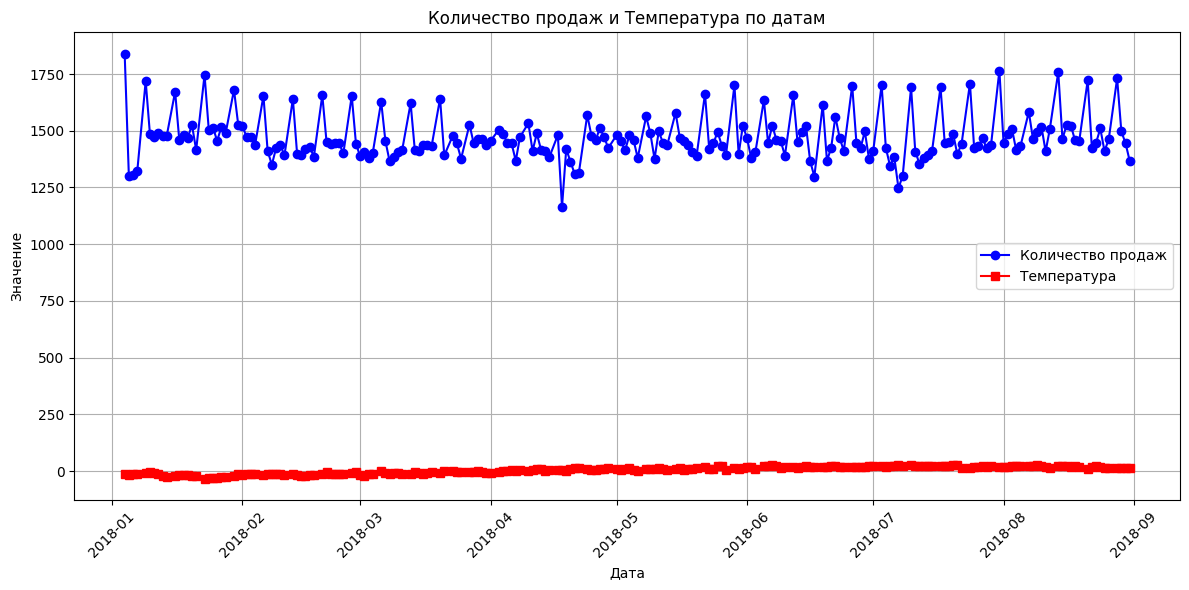

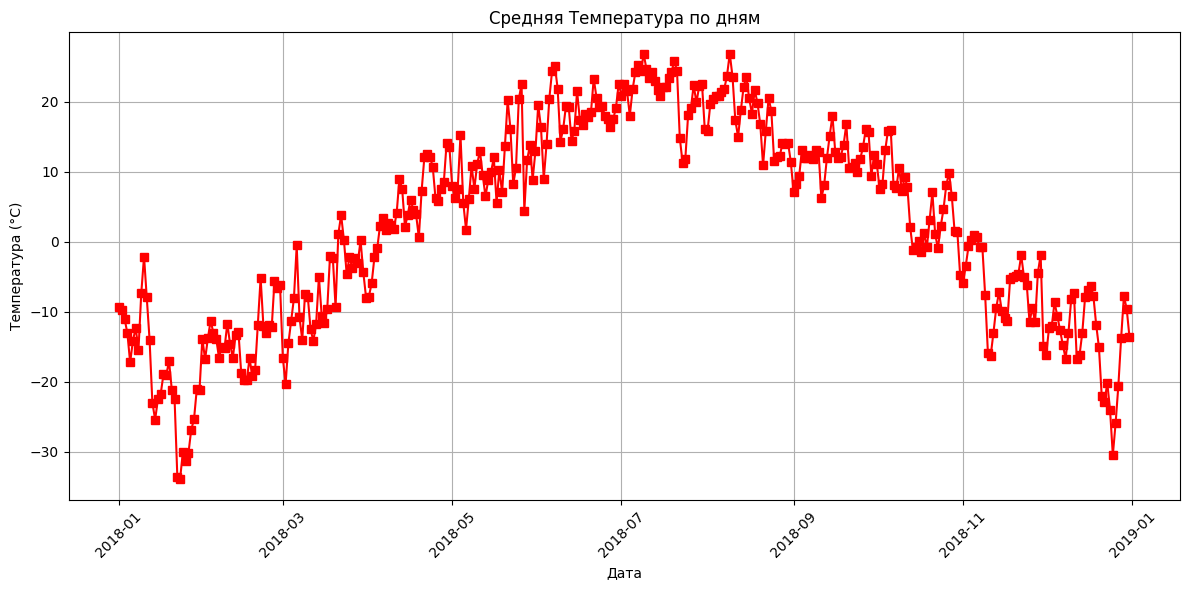

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1. Чтение данных о продажах и погоде
sales_df = pd.read_csv('data.csv', sep=',')  # Загрузка данных с продажами
weather_df = pd.read_excel('weather1.xls')   # Загрузка данных с температурой

# Шаг 2. Приведение даты к правильному формату
sales_df['Дата'] = pd.to_datetime(sales_df['Дата'], errors='coerce')
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True, errors='coerce')

# Шаг 3. Группировка данных по продажам по датам
grouped_sales = sales_df.groupby('Дата').size().reset_index(name='Количество продаж')

# Шаг 4. Преобразование даты в weather_df и вычисление средней температуры по дням
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])  # Преобразуем в формат datetime
avg_temp = weather_df.groupby('Дата')['T'].mean().reset_index()

# Шаг 5. Приведение формата 'Дата' в grouped_sales
grouped_sales['Дата'] = pd.to_datetime(grouped_sales['Дата'])

# Шаг 6. Объединение таблицы с продажами и температурой
merged_df = pd.merge(grouped_sales, avg_temp, on='Дата', how='inner')

# Шаг 7. Построение графика "Количество продаж" и "Температура"
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], marker='o', label='Количество продаж', color='blue')
plt.plot(merged_df['Дата'], merged_df['T'], marker='s', label='Температура', color='red')

# Добавление заголовков и подписей
plt.title('Количество продаж и Температура по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()

# Шаг 8. Отдельный график для температуры
plt.figure(figsize=(12, 6))
plt.plot(avg_temp['Дата'], avg_temp['T'], marker='s', color='red')

# Добавление заголовка и подписей
plt.title('Средняя Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()
